<a href="https://colab.research.google.com/github/Egunjobi-Tunde/FIRST-PORTFOLIO-PROJECT/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pdd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
X_train[0].shape

(32, 32, 3)

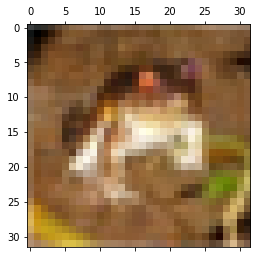

In [8]:
plt.matshow(X_train[0])

In [9]:
def plot(x):
  return plt.matshow(X_train[x])

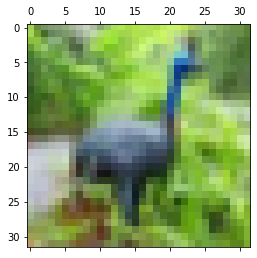

In [10]:
plot(6)

In [11]:
# All the classes of image in the dataset
classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
y_train[6]

array([2], dtype=uint8)

In [13]:
classes[y_train[6][0]]

'bird'

IMAGE WITH THE CORRESPONDING NAME

In [14]:
def plot(x):
  
  print(classes[y_train[x][0]])
  return plt.matshow(X_train[x])
  plt.show()

bird


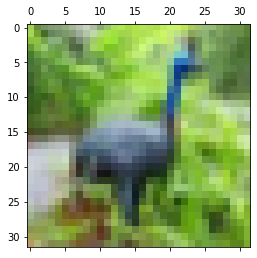

In [15]:
plot(6)

horse


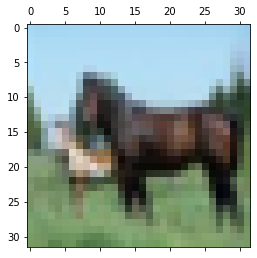

In [16]:
plot(12)

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [19]:
# scaling the data
X_train = X_train/255
X_test = X_test/255

TESTING THE ANN MODEL

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(2500,activation = 'relu' ),
    keras.layers.Dense(500,activation = 'relu' ),
    keras.layers.Dense(100,activation = 'relu' ),
    keras.layers.Dense(10,activation = 'softmax' )

])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

model.fit(X_train,y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 1.9040 - accuracy: 0.3166
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6810 - accuracy: 0.3973
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5962 - accuracy: 0.4274
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5426 - accuracy: 0.4499
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5000 - accuracy: 0.4650
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4603 - accuracy: 0.4763
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4294 - accuracy: 0.4890
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4033 - accuracy: 0.4971
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3845 - accuracy: 0.5061
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.361

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4452 - accuracy: 0.4999


[1.4451615810394287, 0.4999000132083893]

In [22]:
yhat = model.predict(X_test)

In [23]:
yhat = [np.argmax(i) for i in yhat ]
yhat[:5]

[3, 9, 8, 8, 4]

In [24]:
len(yhat),y_test.shape

(10000, (10000, 1))

In [25]:
# It is obvious that the model is not doing well
y_test[:5],yhat[:5]

(array([[3],
        [8],
        [8],
        [0],
        [6]], dtype=uint8), [3, 9, 8, 8, 4])

In [26]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,yhat))

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1000
           1       0.56      0.65      0.61      1000
           2       0.43      0.30      0.35      1000
           3       0.34      0.31      0.33      1000
           4       0.41      0.44      0.42      1000
           5       0.40      0.44      0.42      1000
           6       0.58      0.49      0.53      1000
           7       0.55      0.58      0.57      1000
           8       0.61      0.62      0.62      1000
           9       0.53      0.57      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



All the metrics are low with ANN.

CONVOLUTIONAL NEURAL NETWORK (CNN)

In [27]:
cnn = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(62,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
  
])
#compilation
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(X_train, y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.5557 - accuracy: 0.4310
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2113 - accuracy: 0.5703
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0721 - accuracy: 0.6232
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9779 - accuracy: 0.6580
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9069 - accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8448 - accuracy: 0.7077
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7944 - accuracy: 0.7217
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7515 - accuracy: 0.7374
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7128 - accuracy: 0.7506
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.68

In [31]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8684 - accuracy: 0.7065


[0.8684224486351013, 0.7064999938011169]

In [32]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

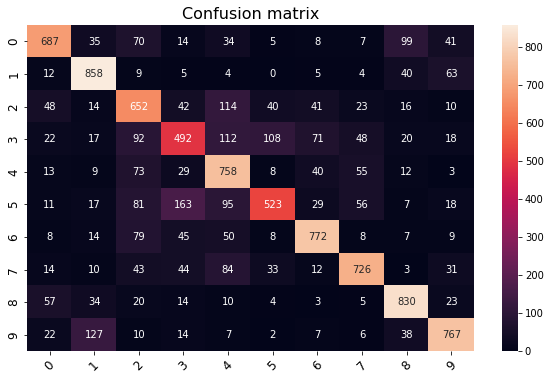

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10, 6))
plt.title('Confusion matrix', fontsize=16)
plt.xticks(np.arange(10),rotation=45, fontsize=12)
plt.yticks(np.arange(10),fontsize=12)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [35]:
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.76      0.86      0.80      1000
           2       0.58      0.65      0.61      1000
           3       0.57      0.49      0.53      1000
           4       0.60      0.76      0.67      1000
           5       0.72      0.52      0.60      1000
           6       0.78      0.77      0.78      1000
           7       0.77      0.73      0.75      1000
           8       0.77      0.83      0.80      1000
           9       0.78      0.77      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



With Convolutional Neural Network the accuracy of the data set increases to 71%.
which is far better compare to 50% obtained with Artificial Neural Network.